In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
inflight_inv = pd.read_csv('Inflight Service_Inventory data.csv')
inflight_pre = pd.read_csv('Inflight Service_Pre order data.csv')
survey_com = pd.read_csv('Survey data _Customer comments.csv')
survey_sat = pd.read_csv('Survey data_Inflight Satisfaction Score.csv')

## understanding data

### Table 1

|Column Name|Datatype|Description|
|-----|-----|-----|
|flight_number|Integer|Flight number|  
|departure_station_code|String|Origin/Departure station code|  
|arrival_station_code|String|Destination/Arrival station code|  
|scheduled_departure_dtl|Date|Flight's scheduled departure date|  
|entree_product_id|String|Product id|  
|entree_description|String|Entrée Description|  
|entree_code|String|Entrée Code|  
|planned_entree_count|Integer|Planned Entrée Qty|  
|consumed_entree_count|Integer|Consumed Entrée Qty|  




In [3]:
inflight_inv.head(3)

,flight_number,departure_station_code,arrival_station_code,scheduled_departure_dtl,entree_product_id,entree_description,entree_code,planned_entree_count,consumed_entree_count
0,2634,IAX,PDX,9/1/2022,58019,Belgium waffle,WF,20,32
1,2666,ORX,IAX,9/1/2022,60549,Vegetarian chili and polenta cake,V,3,0
2,2310,DEX,SAX,9/2/2022,58981,Scrambled eggs,O,9,7


In [4]:
inflight_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61267 entries, 0 to 61266
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   flight_number            61267 non-null  int64 
 1   departure_station_code   61267 non-null  object
 2   arrival_station_code     61267 non-null  object
 3   scheduled_departure_dtl  61267 non-null  object
 4   entree_product_id        61267 non-null  int64 
 5   entree_description       61267 non-null  object
 6   entree_code              61267 non-null  object
 7   planned_entree_count     61267 non-null  int64 
 8   consumed_entree_count    61267 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 4.2+ MB


In [5]:
inflight_inv.describe()

,flight_number,entree_product_id,planned_entree_count,consumed_entree_count
count,61267.000000,61267.000000,61267.000000,61267.000000
mean,1528.316500,59595.351772,7.355248,3.155712
std,868.897413,3506.018657,6.738823,4.664430
min,23.000000,15533.000000,0.000000,-7.000000
25%,763.000000,58563.000000,3.000000,0.000000
50%,1579.000000,60983.000000,6.000000,1.000000
75%,2123.000000,60987.000000,10.000000,5.000000
max,6376.000000,62024.000000,193.000000,100.000000


In [133]:
inflight_inv['diff'] = abs(inflight_inv['planned_entree_count']-inflight_inv['consumed_entree_count'])

In [143]:
inflight_inv.groupby(['departure_station_code','arrival_station_code']).agg({'consumed_entree_count':'sum'}).sort_values(by='consumed_entree_count')

,,consumed_entree_count
departure_station_code,arrival_station_code,
DEX,TVX,0
SNX,HNX,0
EUX,ORX,0
KOX,DEX,0
RNX,EWX,0
...,...,...
DEX,IAX,3353
LAX,EWX,3743
EWX,LAX,3967


In [137]:
inflight_inv.groupby(['entree_code']).agg({'consumed_entree_count':'sum'})

,consumed_entree_count
entree_code,
AV,354
B,6975
BR,446
C,71897
C1,1
C2,5
C3,1
E,3430
E1,0


### Table 2

|Column Name|Datatype|Description|
|----|----|----|
|flight_number|Integer|Flight number|
|departure_station_code|String|Origin/Departure station code|
|arrival_station_code|String|Destination/Arrival station code|
|scheduled_departure_dtl|Date|Flight's scheduled departure date|
|record_locator|String|PNR unique booking id|
|meal_short_description|String|Meal Short Description|
|meal_group|String|Entrée Hot/Cold, Sandwich, Liquor…|
|meal_category|String|Breakfast, Snack, Dinner, Liquor…|
|carrier_code|String|UA|
|cabin_code|String|Business – J, Economy - Y|
|meal_description|String|Meal Full description|
|is entrée|String|Entrée Indicator Y/N|
|meal_preorder_quantity|Integer|Preorder Quantity for the meal item|



In [6]:
inflight_pre.head(3)

,flight_number,departure_station_code,arrival_station_code,record_locator,carrier_code,scheduled_departure_dtl,cabin_code,meal_group,meal_category,meal_short_description,meal_description,is_entree,pre_order_qty
0,1423,INX,DEX,B3XX1H,UA,9/1/2022,J,ENTREES HOT,POULTRY,"Za'atar chicken with spinach, roasted peppers,...","Za'atar chicken with spinach, roasted peppers,...",Y,1
1,1620,IAX,CUX,BFXXJC,UA,9/2/2022,J,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,Tomato and kale baked egg with fire roasted re...,Y,2
2,1852,ORX,PDX,DPXX2H,UA,9/2/2022,J,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,Tomato and kale baked egg with fire roasted re...,Y,1


In [7]:
inflight_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212039 entries, 0 to 212038
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   flight_number            212039 non-null  int64 
 1   departure_station_code   212039 non-null  object
 2   arrival_station_code     212039 non-null  object
 3   record_locator           212039 non-null  object
 4   carrier_code             212039 non-null  object
 5   scheduled_departure_dtl  212039 non-null  object
 6   cabin_code               212039 non-null  object
 7   meal_group               191728 non-null  object
 8   meal_category            191728 non-null  object
 9   meal_short_description   212039 non-null  object
 10  meal_description         137062 non-null  object
 11  is_entree                191728 non-null  object
 12  pre_order_qty            212039 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 21.0+ MB


In [8]:
inflight_pre.describe()

,flight_number,pre_order_qty
count,212039.000000,212039.000000
mean,1454.631634,1.200902
std,726.394631,0.854160
min,2.000000,0.000000
25%,732.000000,1.000000
50%,1556.000000,1.000000
75%,2090.000000,1.000000
max,2685.000000,44.000000


### Table 3

|Column Name|Datatype|Description|
|----|----|----|
|flight_number|Integer|Flight number|
|origin_station_code|String|Origin/Departure station code |
|destination_station_code|String|Destination/Arrival station code |
|scheduled_departure_date|Date|Flight's scheduled departure date|
|arrival_delay_group|String|Grouping for arrival delay time|
|departure_delay_group|String|Grouping for departure delay time|
|entity|String|Latin/Domestic/Atlantic|
|verbatim_text|String|Comment text |
|seat_factor_band|String|Groups of seat factor. Seat factor is the % of seats filled by revenue passengers in a flight|
|ques_verbatim_text|String|survey question|
|loyalty_program_level|String|Mileage Plus Program level|
|fleet_type_description|String|Aircraft type - B737-900/B777-200….|
|fleet_usage|String|Mainline/Express|
|response_group|String|Member/Non-member|


In [9]:
survey_com.head(3)

,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group
0,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B777-200,Mainline,member
1,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,Not a choice.,0 to 70,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member
2,1876,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member


In [10]:
survey_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   flight_number             9424 non-null   int64 
 1   origin_station_code       9424 non-null   object
 2   destination_station_code  9424 non-null   object
 3   scheduled_departure_date  9424 non-null   object
 4   arrival_delay_group       9424 non-null   object
 5   departure_delay_group     9424 non-null   object
 6   entity                    9424 non-null   object
 7   verbatim_text             9424 non-null   object
 8   seat_factor_band          9424 non-null   object
 9   ques_verbatim_text        9424 non-null   object
 10  loyalty_program_level     6920 non-null   object
 11  fleet_type_description    9424 non-null   object
 12  fleet_usage               9424 non-null   object
 13  response_group            9424 non-null   object
dtypes: int64(1), object(13)


### Table 4

|Column Name|Data Type|Description|
|----|----|----|
|flight_number|Integer|Flight number|
|origin_station_code|String|Origin/Departure station code |
|destination_station_code|String|Destination/Arrival station code |
|record_locator|String|PNR unique booking id|
|scheduled_departure_date|Date|Flight's scheduled departure date|
|question_text|String|Survey question|
|score|String|Customer response 0-5|
|satisfaction_type|String|0-3 (Dissatisfied) 4-5(Satisfied)|
|driver_sub_group1|String|food & beverage|
|driver_sub_group2|String|Sub-category within food & beverage|
|arrival_delay_minutes|Integer|Delay time at arrival station|
|arrival_delay_group|String|Group for delay time|
|cabin_code_desc|String|Cabin code description|
|cabin_name|String|Economy/Economy Plus|
|entity|String|Latin/Domestic/Atlantic|
|number_of_legs|Integer|Number of legs in the trip |
|seat_factor_band|String|Groups of seat factor. Seat factor is the % of seats filled by revenue passengers in a flight|
|loyalty_program_level|String|Mileage Plus Program level; Missing value is for Non-Members|
|generation|String|Customer generation - Silent/GenX…|
|fleet_type_description|String|Aircraft type - B737-900/B777-200….|
|fleet_usage|String|Mainline/Express - Mainline is operated by United while express is operated by United express Partners|
|equipment_type_code|String|37K / 77U….|
|ua_uax|String|UA(Mainline)/ UAX (Express)|
|actual_flown_miles|Integer|Distance travelled by the aircraft during the flight|
|haul_type|String|<500 Miles (Short), 500 - 3000 Miles (Medium), >3000 Miles (Long)|
|departure_gate|String|Flight departure gate|
|arrival_gate|String|Flight arrival gate|
|international_domestic_indicator|String|International/Domestic|
|response_group|String|Member/Non-member|
|media_provider|String|Wi-Fi Provider|
|hub_spoke|String|Hub or spoke station|


In [11]:
survey_sat.head(3)

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,...,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,9/1/2022,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure


In [12]:
survey_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47074 entries, 0 to 47073
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   flight_number                     47074 non-null  int64 
 1   origin_station_code               47074 non-null  object
 2   destination_station_code          47074 non-null  object
 3   record_locator                    47074 non-null  object
 4   scheduled_departure_date          47074 non-null  object
 5   question_text                     47074 non-null  object
 6   score                             47074 non-null  object
 7   satisfaction_type                 34963 non-null  object
 8   driver_sub_group1                 47074 non-null  object
 9   driver_sub_group2                 47074 non-null  object
 10  arrival_delay_minutes             47074 non-null  int64 
 11  arrival_delay_group               47074 non-null  object
 12  cabin_code_desc   

In [13]:
survey_sat.describe()

,flight_number,arrival_delay_minutes,number_of_legs,actual_flown_miles
count,47074.000000,47074.000000,47074.000000,47074.000000
mean,1529.855207,-1.702490,1.344118,2477.737732
std,1456.712299,37.868177,0.502424,1865.646538
min,2.000000,-104.000000,1.000000,45.000000
25%,477.000000,-19.000000,1.000000,932.000000
50%,1050.000000,-9.000000,1.000000,1846.000000
75%,2060.000000,4.000000,2.000000,3870.000000
max,6376.000000,907.000000,3.000000,8440.000000


In [169]:
df = survey_sat.loc[survey_sat['score'].isin(['1', '2', '3', '4', '5'])]

In [171]:
df = df.astype({'score':'int'})

In [192]:
adf = df.groupby(['origin_station_code','destination_station_code']).score.agg(['count','mean'])

adf[adf['count']>10]

for ind,(count,mean) in adf.iterrows():
    G.add_edge(ind,weight=mean)
    print(ind,count,mean)
    break

20.0 2.75


## EDA

In [3]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords

In [4]:
def generate_word_cloud(df, column_name):
    """
    Generate a word cloud from a pandas dataframe column.

    Args:
    df: The pandas dataframe.
    column_name: The name of the column to generate the word cloud from.

    Returns:
    A word cloud image.
    """
    
    # Get the text from the dataframe column.
    text = ' '.join(df[column_name]).lower()

    # Create a list of stop words.
    
    stopwordss = stopwords.words('english')
    
    # Split the text into words.
    words = text.split()

    # Remove the stop words from the list of words.
    filtered_words = ''.join([word for word in words if word not in stopwordss])
    
    # Create a word cloud object.
    wordcloud = WordCloud()

    # Generate the word cloud.
    wordcloud.generate(filtered_words)

    # plot the word cloud image.
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

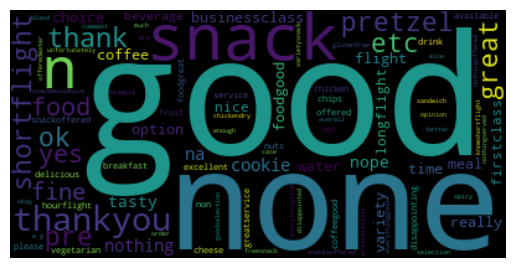

In [5]:
generate_word_cloud(survey_com,'verbatim_text')

In [6]:
survey_com_new = pd.read_csv('survey_com.csv')

In [7]:
survey_com_new.head(3)

,Unnamed: 0,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group,review
0,0,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B777-200,Mainline,member,negative
1,1,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,Not a choice.,0 to 70,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member,neutral
2,2,1876,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member,positive


In [8]:
survey_com[survey_com_new['review']=='positive']

,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group
2,1876,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member
5,1726,SFX,OGX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Hot food options would be nice.,90+,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member
6,929,LHX,ORX,2022-09-01,Early & Ontime,Early & Ontime,Atlantic,"Ok, better than most United flights I have bee...",0 to 70,Is there anything else you'd like to share abo...,NaN,B767-300,Mainline,non-member
13,1827,SFX,DEX,2022-09-02,Early & Ontime,Early & Ontime,Domestic,Grateful United has lemons for tea and coke. N...,90+,Is there anything else you'd like to share abo...,premier silver,B737-900,Mainline,member
16,965,EWX,NAX,2022-09-02,Early & Ontime,Delayed,Atlantic,Having some fresh fruit options (just like app...,90+,Is there anything else you'd like to share abo...,NaN,B767-300,Mainline,non-member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,2493,SEX,IAX,2022-09-27,Early & Ontime,Early & Ontime,Domestic,More choices would be nice.,90+,Is there anything else you'd like to share abo...,non-elite,B737-900,Mainline,member
9401,312,BOX,LAX,2022-09-27,Early & Ontime,Early & Ontime,Domestic,No. Everything was fine.,70+,Is there anything else you'd like to share abo...,NaN,B737-MAX9,Mainline,non-member
9404,6052,MCX,IAX,2022-09-27,Early & Ontime,Early & Ontime,Domestic,There was one attendant who was very efficient...,70+,Is there anything else you'd like to share abo...,non-elite,ERJ-175,Express,member
9410,462,DEX,IAX,2022-09-28,Early & Ontime,Early & Ontime,Domestic,Impossible meatballs were excellent. Dessert w...,90+,Is there anything else you'd like to share abo...,non-elite,B737-800,Mainline,member


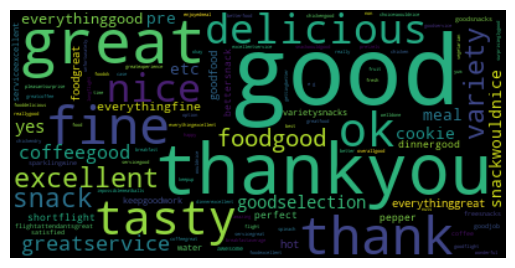

In [10]:
generate_word_cloud(survey_com_new[survey_com_new['review']=='positive'],'verbatim_text')

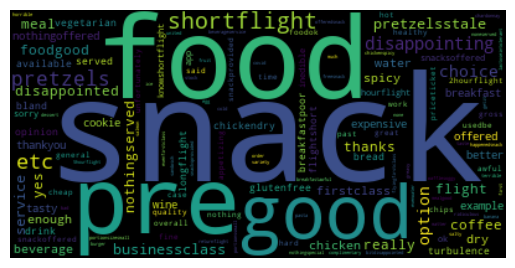

In [11]:
generate_word_cloud(survey_com[survey_com_new['review']=='negative'],'verbatim_text')

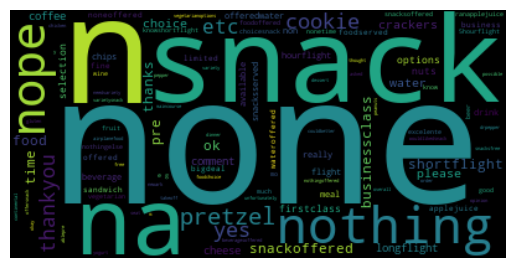

In [12]:
generate_word_cloud(survey_com[survey_com_new['review']=='neutral'],'verbatim_text')

In [76]:
valc = survey_com_new[['scheduled_departure_date','review']].groupby('scheduled_departure_date').value_counts()
valc

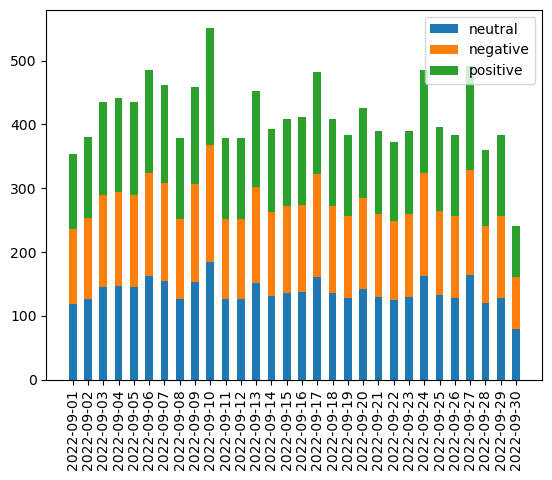

In [125]:
fig, ax = plt.subplots()
width=0.5
bottom=np.zeros(30)
idx = pd.IndexSlice

for label in ['neutral','negative','positive']:
    ind = valc.loc[idx[:,'neutral']].index
    val = valc.loc[idx[:,'neutral']].values
    ax.bar(ind,val,width,bottom=bottom,label=label)
    bottom+=val
ax.legend(loc="upper right")
plt.xticks(rotation=90)
plt.show()